# Очистка данных и обучение моделей

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv('data/hackathon_income_train.csv', sep=';')

In [3]:
df_train['dp_ils_total_seniority'].isna().sum()

np.int64(60103)

In [4]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76786 entries, 0 to 76785
Data columns (total 224 columns):
 #    Column                                                                                           Dtype  
---   ------                                                                                           -----  
 0    id                                                                                               int64  
 1    dt                                                                                               object 
 2    target                                                                                           object 
 3    turn_cur_cr_avg_act_v2                                                                           object 
 4    salary_6to12m_avg                                                                                object 
 5    hdb_bki_total_max_limit                                                                          float64
 6

In [5]:
df_test = pd.read_csv('data/hackathon_income_test.csv', sep=';')

In [6]:
df_test.head(10)

,id,dt,turn_cur_cr_avg_act_v2,salary_6to12m_avg,hdb_bki_total_max_limit,dp_ils_paymentssum_avg_12m,hdb_bki_total_cc_max_limit,incomeValue,gender,avg_cur_cr_turn,...,total_sum,dp_ils_uniq_companies_1y,avg_6m_travel,avg_6m_government_services,hdb_bki_active_cc_max_overdue,total_rur_amt_cm_avg_period_days_ago_v2,label_Above_1M_share_r1,transaction_category_supermarket_sum_cnt_d15,max_balance_rur_amt_1m_af,first_salary_income
0,0,2024-08-31,"805319,38",NaN,61137.47,NaN,60000.0,"159999,0",Женский,"69740,0",...,NaN,NaN,"0,0","0,0",NaN,"80228,0","0,0","1,0",NaN,NaN
1,1,2024-10-31,"306240,0",NaN,949500.00,NaN,230000.0,"108834,0",Мужской,"63513,0",...,"0,0",NaN,"0,0","0,0",0.00,"24888,0","0,0",NaN,NaN,NaN
2,3,2024-09-30,"164908,72999999998",NaN,178000.00,NaN,178000.0,"59203,0",Женский,"132,0",...,"38630,630000000005",NaN,"0,0","0,0",2363.90,"223,0",NaN,NaN,NaN,NaN
3,9,2024-10-31,"2374846,42",NaN,25500.00,"126247,44835851202",4999.0,"180906,0",Женский,"290339,0",...,NaN,"3,0","800,0","0,0",NaN,"25734,0","0,0","7,0","0,0",NaN
4,11,2024-11-30,"735902,71","47828,145620567375",60000.00,NaN,60000.0,"24922,0",Мужской,"76924,0",...,"0,0",NaN,"0,0","0,0",0.00,"1214,0","0,0","15,0",NaN,NaN
5,12,2024-11-30,"1780817,36",NaN,1916000.00,NaN,NaN,"63038,0",Женский,"129995,0",...,NaN,NaN,"0,0","0,0",NaN,"420710,0","0,006578947368421052","13,0",NaN,NaN
6,13,2024-11-30,"741169,96",NaN,150000.00,"164648,48147631905",75000.0,"53896,0",Женский,"137249,0",...,"0,0","1,0","0,0","0,0",0.00,"227659,0",NaN,"4,0",NaN,NaN
7,15,2024-08-31,"1483016,0066666668",NaN,600000.00,NaN,600000.0,"62668,0",Мужской,"907642,0",...,"742,65",NaN,"0,0","25,0",0.00,"893351,0","0,0","23,0","751,0",NaN
8,16,2024-09-30,NaN,NaN,1240000.00,NaN,120000.0,"48659,0",Женский,"0,0",...,"0,0",NaN,NaN,NaN,0.00,"14,0",NaN,NaN,NaN,NaN
9,17,2024-10-31,NaN,NaN,386885.88,NaN,14000.0,NaN,Женский,NaN,...,NaN,NaN,NaN,NaN,669.02,"0,0",NaN,NaN,NaN,NaN


# Обработка данных исходя из гипотез

#### Сколько в train пропусков?

In [7]:
df_train.isna().sum()

id                                                  0
dt                                                  0
target                                              0
turn_cur_cr_avg_act_v2                          17708
salary_6to12m_avg                               61911
                                                ...  
label_Above_1M_share_r1                         42776
transaction_category_supermarket_sum_cnt_d15    41852
max_balance_rur_amt_1m_af                       65653
w                                                   0
first_salary_income                             68118
Length: 224, dtype: int64

#### Из целевой переменной делаем типа str делаем float

In [8]:
df_train['target'] = df_train['target'].str.replace(",", ".").astype(np.float64)

#### Логарифмируем целевую переменную

In [9]:
df_train['target'] = np.log1p(df_train['target'])

#### Преобразовываем возвраст в целочисленный тип

In [10]:
df_train['age'] = df_train['age'].str.replace(",", ".").astype(np.float64)
df_train['age'] = df_train['age'].astype(np.float64)

#### Энкодим пол (муж - 0, жен - 1)

In [11]:
d = {'Мужской': 0, 'Женский': 1}

In [12]:
df_train['gender'] = df_train['gender'].map(d)

#### Меняем тип признаку salary_6to12m_avg и логарифмируем его

In [13]:
df_train['salary_6to12m_avg'] = df_train['salary_6to12m_avg'].str.replace(",", ".").astype(np.float64)

In [14]:
df_train['log_salary_6to12m_agg'] = np.log1p(df_train['salary_6to12m_avg'])

In [15]:
df_train['is_salary_known'] = df_train['log_salary_6to12m_agg'].notna().astype(int)

In [16]:
df_train = df_train.drop('salary_6to12m_avg', axis=1)

#### Обработаем регионы

In [17]:
df_train.adminarea.isna().sum()

np.int64(19563)

In [18]:
df_train['adminarea'] = df_train['adminarea'].fillna("unknown")

#### Заполним пропуски в per_capita_income_rur_amt медианой по региону                                 

In [19]:
df_train['per_capita_income_rur_amt'].isna().sum()

np.int64(7394)

In [20]:
df_train['per_capita_income_rur_amt'] = df_train['per_capita_income_rur_amt'].str.replace(',', '.').astype(np.float64)

In [21]:
income_per_area = df_train.groupby('adminarea')['per_capita_income_rur_amt'].mean()

In [22]:
df_train['per_capita_income_rur_amt'] = df_train['per_capita_income_rur_amt'].fillna(
    df_train['adminarea'].map(income_per_area)
)


In [23]:
df_train.isna().sum()['per_capita_income_rur_amt']

np.int64(0)

#### Просто добавим флаг для NaN в turn_other_cr_avg_act_v2

In [24]:
df_train['turn_other_cr_avg_act_v2'] = df_train['turn_other_cr_avg_act_v2'].str.replace(',', '.').astype(np.float64)

In [25]:
df_train['is_na_turn_other_cr_avg_act_v2'] = df_train['turn_other_cr_avg_act_v2'].isna().astype(int)

In [26]:
df_train['log_turn_other_cr_avg_act_v2'] = np.log1p(df_train['turn_other_cr_avg_act_v2'])
df_train = df_train.drop('turn_other_cr_avg_act_v2', axis=1)

#### Обработаем долю транзакций в супермаркетах

In [27]:
df_train['transaction_category_supermarket_sum_cnt_m2'] = \
df_train['transaction_category_supermarket_sum_cnt_m2'].str.replace(',', '.').astype(np.float64)

In [28]:
df_train['transaction_category_supermarket_percent_cnt_2m'] = \
df_train['transaction_category_supermarket_percent_cnt_2m'].str.replace(',', '.').astype(np.float64)

In [29]:
df_train[df_train['transaction_category_supermarket_sum_cnt_m2'] == 0]
# Нет пользователей, которые не тратили бы в магазинах

,id,dt,target,turn_cur_cr_avg_act_v2,hdb_bki_total_max_limit,dp_ils_paymentssum_avg_12m,hdb_bki_total_cc_max_limit,incomeValue,gender,avg_cur_cr_turn,...,total_rur_amt_cm_avg_period_days_ago_v2,label_Above_1M_share_r1,transaction_category_supermarket_sum_cnt_d15,max_balance_rur_amt_1m_af,w,first_salary_income,log_salary_6to12m_agg,is_salary_known,is_na_turn_other_cr_avg_act_v2,log_turn_other_cr_avg_act_v2


In [30]:
df_train['transaction_category_supermarket_percent_cnt_2m'] = \
df_train['transaction_category_supermarket_percent_cnt_2m'].fillna(df_train['transaction_category_supermarket_percent_cnt_2m'].mean())

#### Обработаем количество транзакций в реторане

In [31]:
df_train['transaction_category_restaurants_sum_amt_m2'] = \
df_train['transaction_category_restaurants_sum_amt_m2'].str.replace(',', '.').astype(np.float64)

In [32]:
# Заполним в данном признаке пропуски нулями тк не все ходят в рестораны
df_train['transaction_category_restaurants_sum_amt_m2'] = df_train['transaction_category_restaurants_sum_amt_m2'].fillna(0.0)

In [33]:
df_train['log_transaction_category_restaurants_sum_amt_m2'] = np.log1p(df_train['transaction_category_restaurants_sum_amt_m2'])

In [34]:
df_train = df_train.drop('transaction_category_restaurants_sum_amt_m2', axis=1)

#### Обработаем количество транзакций по отелям

In [35]:
df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'] = \
df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'].str.replace(',', '.').astype(np.float64)

df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'] = \
df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'].fillna(0.0)

df_train['log_avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'] = \
np.log1p(df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'])

df_train = df_train.drop('avg_by_category__amount__sum__cashflowcategory_name__puteshestvija', axis=1)

#### Обработаем веса

In [36]:
df_train['w'] = df_train['w'].str.replace(',', '.').astype(np.float64)

## Итоговый датасет

In [37]:
df = df_train[['target', 'age', 'gender', 'log_salary_6to12m_agg', 'is_salary_known', 
    'per_capita_income_rur_amt', 'log_turn_other_cr_avg_act_v2', 'is_na_turn_other_cr_avg_act_v2', 'transaction_category_supermarket_percent_cnt_2m',
    'log_transaction_category_restaurants_sum_amt_m2', 'log_avg_by_category__amount__sum__cashflowcategory_name__puteshestvija', 'w']]

In [38]:
X, y = df.drop('target', axis=1), df['target']

## Обучаем бейзлайн

In [39]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=101)

In [42]:
weights_train = X_train['w']
weights_val = X_val['w']

X_train = X_train.drop('w', axis=1)
X_val = X_val.drop('w', axis=1)

In [45]:
from catboost import CatBoostRegressor, Pool

In [44]:
cat_features = ['is_salary_known', 'is_na_turn_other_cr_avg_act_v2']  

train_pool = Pool(
    data=X_train, 
    label=y_train, 
    weight=weights_train,
    cat_features=cat_features
)

valid_pool = Pool(
    data=X_val, 
    label=y_val, 
    weight=weights_val,
    cat_features=cat_features
)


model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='MAE',   
    eval_metric='MAE',     
    random_seed=42,
    verbose=100
)

# Обучаем модель
model.fit(
    train_pool,
    eval_set=valid_pool,
    early_stopping_rounds=50
)

0:	learn: 0.9375766	test: 0.9395731	best: 0.9395731 (0)	total: 147ms	remaining: 2m 26s
100:	learn: 0.6529426	test: 0.6595651	best: 0.6595651 (100)	total: 634ms	remaining: 5.64s
200:	learn: 0.6510958	test: 0.6582839	best: 0.6582839 (200)	total: 1.12s	remaining: 4.46s
300:	learn: 0.6506867	test: 0.6579674	best: 0.6579372 (290)	total: 1.6s	remaining: 3.73s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6579372364
bestIteration = 290

Shrink model to first 291 iterations.


In [54]:
#WMAE
def weighted_mean_absolute_error(y_true, y_pred, weights):
    return (weights * np.abs(y_true - y_pred)).mean()

In [46]:
y_valid = np.expm1(y_val)
y_pred = np.expm1(model.predict(X_val))
weighted_mean_absolute_error(y_valid, y_pred, weights_val)

np.float64(54835.1112015122)

# Этап полной обработки данных, включая гипотезы

In [40]:
def categorize_position(position):
    if pd.isna(position):
        return 'unknown'
    
    position_lower = str(position).lower()
    
    if any(word in position_lower for word in ['руководитель', 'директор', 'начальник', 'заведующий', 'управляющий']):
        return 'management'
    
    elif any(word in position_lower for word in ['специалист', 'менеджер', 'аналитик', 'эксперт']):
        return 'specialist'
    
    elif any(word in position_lower for word in ['программист', 'разработчик', 'инженер', 'техник']):
        return 'it_tech'
    
    elif any(word in position_lower for word in ['рабочий', 'оператор', 'водитель', 'грузчик']):
        return 'worker'
    
    elif any(word in position_lower for word in ['продавец', 'консультант', 'кассир', 'официант']):
        return 'service'
    
    elif any(word in position_lower for word in ['врач', 'медик', 'медсестра', 'фельдшер']):
        return 'medical'
    
    elif any(word in position_lower for word in ['преподаватель', 'учитель', 'педагог']):
        return 'education'
    
    elif any(word in position_lower for word in ['бухгалтер', 'экономист', 'финансист']):
        return 'finance'
    
    else:
        return 'other'

In [125]:
def preprocessing_train(df_train):
    # Сначала обработаем даты отдельно
    if 'dt' in df_train.columns:
        df_train['dt'] = pd.to_datetime(df_train['dt'])
        df_train['month'] = df_train['dt'].dt.month
        df_train['quarter'] = df_train['dt'].dt.quarter
        df_train['is_year_end'] = df_train['month'].isin([11, 12]).astype(int)
    
    # Список числовых признаков, которые нужно обработать
    numeric_columns = [
        'target', 'age', 'w', 'salary_6to12m_avg', 'per_capita_income_rur_amt',
        'turn_other_cr_avg_act_v2', 'transaction_category_supermarket_percent_cnt_2m',
        'transaction_category_restaurants_sum_amt_m2', 
        'avg_by_category__amount__sum__cashflowcategory_name__puteshestvija',
        'dp_ils_avg_salary_1y', 'turn_save_cr_max_v2', 'incomeValue',
        'hdb_bki_total_max_limit', 'turn_cur_cr_avg_act_v2', 'turn_cur_db_avg_act_v2',
        'total_rur_amt_cm_avg', 'hdb_bki_total_cnt', 'dp_ils_total_seniority'
    ]
    
    # Массовая обработка числовых признаков с проверкой на даты
    for col in numeric_columns:
        if col in df_train.columns:
            # Пропускаем нестроковые значения
            if df_train[col].dtype == 'object':
                # Заменяем запятые на точки и пытаемся преобразовать
                df_train[col] = df_train[col].astype(str).str.replace(',', '.')
                
                # Удаляем даты и другие некорректные значения
                mask = ~df_train[col].str.contains(r'^\d{4}-\d{2}-\d{2}', na=False)
                df_train.loc[~mask, col] = np.nan
                
                # Преобразуем в float
                df_train[col] = pd.to_numeric(df_train[col], errors='coerce')
    
    # Target preprocessing
    df_train['target'] = np.log1p(df_train['target'])
    
    # Basic demographics
    d = {'Мужской': 0, 'Женский': 1}
    df_train['gender'] = df_train['gender'].map(d)
    
    # Salary features
    df_train['log_salary_6to12m_agg'] = np.log1p(df_train['salary_6to12m_avg'])
    df_train['is_salary_known'] = df_train['log_salary_6to12m_agg'].notna().astype(int)
    
    # Income and region
    df_train['adminarea'] = df_train['adminarea'].fillna("unknown")
    income_per_area = df_train.groupby('adminarea')['per_capita_income_rur_amt'].mean()
    df_train['per_capita_income_rur_amt'] = df_train['per_capita_income_rur_amt'].fillna(
        df_train['adminarea'].map(income_per_area)
    )
    
    # Credit features (с проверкой на существование)
    if 'turn_other_cr_avg_act_v2' in df_train.columns:
        df_train['log_turn_other_cr_avg_act_v2'] = np.log1p(df_train['turn_other_cr_avg_act_v2'])
    
    if 'turn_cur_cr_avg_act_v2' in df_train.columns:
        df_train['log_turn_cur_cr_avg_act_v2'] = np.log1p(df_train['turn_cur_cr_avg_act_v2'])
    
    if 'turn_cur_db_avg_act_v2' in df_train.columns:
        df_train['log_turn_cur_db_avg_act_v2'] = np.log1p(df_train['turn_cur_db_avg_act_v2'])
    
    if 'total_rur_amt_cm_avg' in df_train.columns:
        df_train['log_total_rur_amt_cm_avg'] = np.log1p(df_train['total_rur_amt_cm_avg'])
    
    # Credit utilization ratios (с проверкой)
    if all(col in df_train.columns for col in ['turn_cur_cr_avg_act_v2', 'incomeValue']):
        df_train['credit_utilization'] = df_train['turn_cur_cr_avg_act_v2'] / (df_train['incomeValue'] + 1)
    
    if all(col in df_train.columns for col in ['turn_cur_cr_avg_act_v2', 'turn_cur_db_avg_act_v2']):
        df_train['cr_db_ratio'] = df_train['turn_cur_cr_avg_act_v2'] / (df_train['turn_cur_db_avg_act_v2'] + 1)
    
    # Transaction patterns
    if 'transaction_category_supermarket_percent_cnt_2m' in df_train.columns:
        df_train['transaction_category_supermarket_percent_cnt_2m'] = \
        df_train['transaction_category_supermarket_percent_cnt_2m'].fillna(
            df_train['transaction_category_supermarket_percent_cnt_2m'].mean()
        )
    
    if 'transaction_category_restaurants_sum_amt_m2' in df_train.columns:
        df_train['transaction_category_restaurants_sum_amt_m2'] = \
        df_train['transaction_category_restaurants_sum_amt_m2'].fillna(0.0)
        df_train['log_transaction_category_restaurants_sum_amt_m2'] = \
        np.log1p(df_train['transaction_category_restaurants_sum_amt_m2'])
    
    if 'avg_by_category__amount__sum__cashflowcategory_name__puteshestvija' in df_train.columns:
        df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'] = \
        df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'].fillna(0.0)
        df_train['log_avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'] = \
        np.log1p(df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'])
    
    # Entertainment ratio
    if all(col in df_train.columns for col in ['transaction_category_restaurants_sum_amt_m2', 
                                             'avg_by_category__amount__sum__cashflowcategory_name__puteshestvija',
                                             'incomeValue']):
        df_train['entertainment_ratio'] = (
            df_train['transaction_category_restaurants_sum_amt_m2'] + 
            df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija']
        ) / (df_train['incomeValue'] + 1)
    
    # Transaction diversity
    transaction_cols = []
    for col in ['transaction_category_supermarket_percent_cnt_2m',
                'transaction_category_restaurants_sum_amt_m2',
                'avg_by_category__amount__sum__cashflowcategory_name__puteshestvija']:
        if col in df_train.columns:
            transaction_cols.append(col)
    
    if transaction_cols:
        df_train['transaction_diversity'] = df_train[transaction_cols].notna().sum(axis=1)
    
    # Additional financial features
    if 'dp_ils_avg_salary_1y' in df_train.columns:
        df_train['log_dp_ils_avg_salary_1y'] = np.log1p(df_train['dp_ils_avg_salary_1y'])
    
    if 'turn_save_cr_max_v2' in df_train.columns:
        df_train['log_turn_save_cr_max_v2'] = np.log1p(df_train['turn_save_cr_max_v2'])
    
    # Credit history features
    if 'hdb_bki_total_cnt' in df_train.columns:
        df_train['hdb_bki_total_cnt'] = df_train['hdb_bki_total_cnt'].fillna(0)
        df_train['loan_cnt_category'] = 'unknown'
        df_train.loc[df_train['hdb_bki_total_cnt'] == 0, 'loan_cnt_category'] = 'no_loans'
        df_train.loc[df_train['hdb_bki_total_cnt'] == 1, 'loan_cnt_category'] = 'one_loan'
        df_train.loc[(df_train['hdb_bki_total_cnt'] >= 2) & (df_train['hdb_bki_total_cnt'] <= 3), 'loan_cnt_category'] = 'few_loans'
        df_train.loc[df_train['hdb_bki_total_cnt'] > 3, 'loan_cnt_category'] = 'many_loans'
        df_train['has_credit_history'] = (df_train['hdb_bki_total_cnt'] > 0).astype(int)
    
    # Employment features
    if 'dp_ils_total_seniority' in df_train.columns:
        df_train['dp_ils_total_seniority'] = df_train['dp_ils_total_seniority'].fillna(0)
        df_train['seniority_group'] = 'unknown'
        df_train.loc[df_train['dp_ils_total_seniority'] <= 1, 'seniority_group'] = '0-1'
        df_train.loc[(df_train['dp_ils_total_seniority'] > 1) & (df_train['dp_ils_total_seniority'] <= 3), 'seniority_group'] = '1-3'
        df_train.loc[(df_train['dp_ils_total_seniority'] > 3) & (df_train['dp_ils_total_seniority'] <= 5), 'seniority_group'] = '3-5'
        df_train.loc[(df_train['dp_ils_total_seniority'] > 5) & (df_train['dp_ils_total_seniority'] <= 10), 'seniority_group'] = '5-10'
        df_train.loc[df_train['dp_ils_total_seniority'] > 10, 'seniority_group'] = '10+'
        
        if 'age' in df_train.columns:
            df_train['job_stability'] = df_train['dp_ils_total_seniority'] / (df_train['age'] - 18 + 1)
    
    # Geography
    df_train['is_moscow_spb'] = df_train['adminarea'].isin(['г. Москва', 'г. Санкт-Петербург']).astype(int)
    
    # Age groups
    if 'age' in df_train.columns:
        df_train['age_group'] = 'unknown'
        df_train.loc[df_train['age'] <= 25, 'age_group'] = '18-25'
        df_train.loc[(df_train['age'] > 25) & (df_train['age'] <= 35), 'age_group'] = '26-35'
        df_train.loc[(df_train['age'] > 35) & (df_train['age'] <= 45), 'age_group'] = '36-45'
        df_train.loc[(df_train['age'] > 45) & (df_train['age'] <= 55), 'age_group'] = '46-55'
        df_train.loc[df_train['age'] > 55, 'age_group'] = '55+'
    
    # Interaction features
    if all(col in df_train.columns for col in ['age', 'log_salary_6to12m_agg']):
        df_train['interaction'] = df_train['age'] * df_train['log_salary_6to12m_agg']
    
    if all(col in df_train.columns for col in ['log_salary_6to12m_agg', 'per_capita_income_rur_amt']):
        df_train['salary_vs_region'] = df_train['log_salary_6to12m_agg'] / df_train['per_capita_income_rur_amt']
    
    # Core financials
    if 'hdb_bki_total_max_limit' in df_train.columns:
        df_train['log_hdb_bki_total_max_limit'] = np.log1p(df_train['hdb_bki_total_max_limit'])
    
    if 'dp_ewb_last_employment_position' in df_train.columns:
        df_train['dp_ewb_last_employment_position'] = df_train['dp_ewb_last_employment_position'].map(categorize_position)
    
    # Savings ratio
    if all(col in df_train.columns for col in ['turn_save_cr_max_v2', 'incomeValue']):
        df_train['savings_ratio'] = df_train['turn_save_cr_max_v2'] / (df_train['incomeValue'] + 1)
    
    # Drop original columns
    cols_to_drop = [
        'salary_6to12m_avg', 'turn_other_cr_avg_act_v2', 
        'transaction_category_restaurants_sum_amt_m2',
        'avg_by_category__amount__sum__cashflowcategory_name__puteshestvija',
        'turn_cur_cr_avg_act_v2', 'turn_cur_db_avg_act_v2', 'total_rur_amt_cm_avg',
        'dp_ils_avg_salary_1y', 'turn_save_cr_max_v2', 'hdb_bki_total_max_limit'
    ]
    
    df_train = df_train.drop([col for col in cols_to_drop if col in df_train.columns], axis=1)

    all_features_for_training = [
        # Демография
        'target', 'age', 'gender', 'w',
        
        # География
        'adminarea', 'is_moscow_spb', 'per_capita_income_rur_amt',
        
        # Зарплата и доход
        'log_salary_6to12m_agg', 'is_salary_known', 'incomeValue',
        'log_dp_ils_avg_salary_1y', 'salary_vs_region',
        
        # Кредитная история
        'log_turn_other_cr_avg_act_v2', 'log_turn_cur_cr_avg_act_v2',
        'log_turn_cur_db_avg_act_v2', 'log_total_rur_amt_cm_avg',
        'log_hdb_bki_total_max_limit', 'credit_utilization', 'cr_db_ratio',
        'hdb_bki_total_cnt', 'loan_cnt_category', 'has_credit_history',
        
        # Транзакции и траты
        'transaction_category_supermarket_percent_cnt_2m',
        'log_transaction_category_restaurants_sum_amt_m2',
        'log_avg_by_category__amount__sum__cashflowcategory_name__puteshestvija',
        'entertainment_ratio', 'transaction_diversity',
        
        # Сбережения
        'log_turn_save_cr_max_v2', 'savings_ratio',
        
        # Работа и карьера
        'dp_ewb_last_employment_position', 'dp_ils_total_seniority',
        'seniority_group', 'job_stability',
        
        # Время
        'month', 'quarter', 'is_year_end',
        
        # Возрастные группы
        'age_group',
        
        # Взаимодействия
        'interaction'
    ]

    return df_train[all_features_for_training]

In [127]:
def preprocessing_test(df_train):
    # Сначала обработаем даты отдельно
    if 'dt' in df_train.columns:
        df_train['dt'] = pd.to_datetime(df_train['dt'])
        df_train['month'] = df_train['dt'].dt.month
        df_train['quarter'] = df_train['dt'].dt.quarter
        df_train['is_year_end'] = df_train['month'].isin([11, 12]).astype(int)
    
    # Список числовых признаков, которые нужно обработать
    numeric_columns = [
        'age', 'salary_6to12m_avg', 'per_capita_income_rur_amt',
        'turn_other_cr_avg_act_v2', 'transaction_category_supermarket_percent_cnt_2m',
        'transaction_category_restaurants_sum_amt_m2', 
        'avg_by_category__amount__sum__cashflowcategory_name__puteshestvija',
        'dp_ils_avg_salary_1y', 'turn_save_cr_max_v2', 'incomeValue',
        'hdb_bki_total_max_limit', 'turn_cur_cr_avg_act_v2', 'turn_cur_db_avg_act_v2',
        'total_rur_amt_cm_avg', 'hdb_bki_total_cnt', 'dp_ils_total_seniority'
    ]
    
    # Массовая обработка числовых признаков с проверкой на даты
    for col in numeric_columns:
        if col in df_train.columns:
            # Пропускаем нестроковые значения
            if df_train[col].dtype == 'object':
                # Заменяем запятые на точки и пытаемся преобразовать
                df_train[col] = df_train[col].astype(str).str.replace(',', '.')
                
                # Удаляем даты и другие некорректные значения
                mask = ~df_train[col].str.contains(r'^\d{4}-\d{2}-\d{2}', na=False)
                df_train.loc[~mask, col] = np.nan
                
                # Преобразуем в float
                df_train[col] = pd.to_numeric(df_train[col], errors='coerce')
    
    
    # Basic demographics
    d = {'Мужской': 0, 'Женский': 1}
    df_train['gender'] = df_train['gender'].map(d)
    
    # Salary features
    df_train['log_salary_6to12m_agg'] = np.log1p(df_train['salary_6to12m_avg'])
    df_train['is_salary_known'] = df_train['log_salary_6to12m_agg'].notna().astype(int)
    
    # Income and region
    df_train['adminarea'] = df_train['adminarea'].fillna("unknown")
    income_per_area = df_train.groupby('adminarea')['per_capita_income_rur_amt'].mean()
    df_train['per_capita_income_rur_amt'] = df_train['per_capita_income_rur_amt'].fillna(
        df_train['adminarea'].map(income_per_area)
    )
    
    # Credit features (с проверкой на существование)
    if 'turn_other_cr_avg_act_v2' in df_train.columns:
        df_train['log_turn_other_cr_avg_act_v2'] = np.log1p(df_train['turn_other_cr_avg_act_v2'])
    
    if 'turn_cur_cr_avg_act_v2' in df_train.columns:
        df_train['log_turn_cur_cr_avg_act_v2'] = np.log1p(df_train['turn_cur_cr_avg_act_v2'])
    
    if 'turn_cur_db_avg_act_v2' in df_train.columns:
        df_train['log_turn_cur_db_avg_act_v2'] = np.log1p(df_train['turn_cur_db_avg_act_v2'])
    
    if 'total_rur_amt_cm_avg' in df_train.columns:
        df_train['log_total_rur_amt_cm_avg'] = np.log1p(df_train['total_rur_amt_cm_avg'])
    
    # Credit utilization ratios (с проверкой)
    if all(col in df_train.columns for col in ['turn_cur_cr_avg_act_v2', 'incomeValue']):
        df_train['credit_utilization'] = df_train['turn_cur_cr_avg_act_v2'] / (df_train['incomeValue'] + 1)
    
    if all(col in df_train.columns for col in ['turn_cur_cr_avg_act_v2', 'turn_cur_db_avg_act_v2']):
        df_train['cr_db_ratio'] = df_train['turn_cur_cr_avg_act_v2'] / (df_train['turn_cur_db_avg_act_v2'] + 1)
    
    # Transaction patterns
    if 'transaction_category_supermarket_percent_cnt_2m' in df_train.columns:
        df_train['transaction_category_supermarket_percent_cnt_2m'] = \
        df_train['transaction_category_supermarket_percent_cnt_2m'].fillna(
            df_train['transaction_category_supermarket_percent_cnt_2m'].mean()
        )
    
    if 'transaction_category_restaurants_sum_amt_m2' in df_train.columns:
        df_train['transaction_category_restaurants_sum_amt_m2'] = \
        df_train['transaction_category_restaurants_sum_amt_m2'].fillna(0.0)
        df_train['log_transaction_category_restaurants_sum_amt_m2'] = \
        np.log1p(df_train['transaction_category_restaurants_sum_amt_m2'])
    
    if 'avg_by_category__amount__sum__cashflowcategory_name__puteshestvija' in df_train.columns:
        df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'] = \
        df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'].fillna(0.0)
        df_train['log_avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'] = \
        np.log1p(df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija'])
    
    # Entertainment ratio
    if all(col in df_train.columns for col in ['transaction_category_restaurants_sum_amt_m2', 
                                             'avg_by_category__amount__sum__cashflowcategory_name__puteshestvija',
                                             'incomeValue']):
        df_train['entertainment_ratio'] = (
            df_train['transaction_category_restaurants_sum_amt_m2'] + 
            df_train['avg_by_category__amount__sum__cashflowcategory_name__puteshestvija']
        ) / (df_train['incomeValue'] + 1)
    
    # Transaction diversity
    transaction_cols = []
    for col in ['transaction_category_supermarket_percent_cnt_2m',
                'transaction_category_restaurants_sum_amt_m2',
                'avg_by_category__amount__sum__cashflowcategory_name__puteshestvija']:
        if col in df_train.columns:
            transaction_cols.append(col)
    
    if transaction_cols:
        df_train['transaction_diversity'] = df_train[transaction_cols].notna().sum(axis=1)
    
    # Additional financial features
    if 'dp_ils_avg_salary_1y' in df_train.columns:
        df_train['log_dp_ils_avg_salary_1y'] = np.log1p(df_train['dp_ils_avg_salary_1y'])
    
    if 'turn_save_cr_max_v2' in df_train.columns:
        df_train['log_turn_save_cr_max_v2'] = np.log1p(df_train['turn_save_cr_max_v2'])
    
    # Credit history features
    if 'hdb_bki_total_cnt' in df_train.columns:
        df_train['hdb_bki_total_cnt'] = df_train['hdb_bki_total_cnt'].fillna(0)
        df_train['loan_cnt_category'] = 'unknown'
        df_train.loc[df_train['hdb_bki_total_cnt'] == 0, 'loan_cnt_category'] = 'no_loans'
        df_train.loc[df_train['hdb_bki_total_cnt'] == 1, 'loan_cnt_category'] = 'one_loan'
        df_train.loc[(df_train['hdb_bki_total_cnt'] >= 2) & (df_train['hdb_bki_total_cnt'] <= 3), 'loan_cnt_category'] = 'few_loans'
        df_train.loc[df_train['hdb_bki_total_cnt'] > 3, 'loan_cnt_category'] = 'many_loans'
        df_train['has_credit_history'] = (df_train['hdb_bki_total_cnt'] > 0).astype(int)
    
    # Employment features
    if 'dp_ils_total_seniority' in df_train.columns:
        df_train['dp_ils_total_seniority'] = df_train['dp_ils_total_seniority'].fillna(0)
        df_train['seniority_group'] = 'unknown'
        df_train.loc[df_train['dp_ils_total_seniority'] <= 1, 'seniority_group'] = '0-1'
        df_train.loc[(df_train['dp_ils_total_seniority'] > 1) & (df_train['dp_ils_total_seniority'] <= 3), 'seniority_group'] = '1-3'
        df_train.loc[(df_train['dp_ils_total_seniority'] > 3) & (df_train['dp_ils_total_seniority'] <= 5), 'seniority_group'] = '3-5'
        df_train.loc[(df_train['dp_ils_total_seniority'] > 5) & (df_train['dp_ils_total_seniority'] <= 10), 'seniority_group'] = '5-10'
        df_train.loc[df_train['dp_ils_total_seniority'] > 10, 'seniority_group'] = '10+'
        
        if 'age' in df_train.columns:
            df_train['job_stability'] = df_train['dp_ils_total_seniority'] / (df_train['age'] - 18 + 1)
    
    # Geography
    df_train['is_moscow_spb'] = df_train['adminarea'].isin(['г. Москва', 'г. Санкт-Петербург']).astype(int)
    
    # Age groups
    if 'age' in df_train.columns:
        df_train['age_group'] = 'unknown'
        df_train.loc[df_train['age'] <= 25, 'age_group'] = '18-25'
        df_train.loc[(df_train['age'] > 25) & (df_train['age'] <= 35), 'age_group'] = '26-35'
        df_train.loc[(df_train['age'] > 35) & (df_train['age'] <= 45), 'age_group'] = '36-45'
        df_train.loc[(df_train['age'] > 45) & (df_train['age'] <= 55), 'age_group'] = '46-55'
        df_train.loc[df_train['age'] > 55, 'age_group'] = '55+'
    
    # Interaction features
    if all(col in df_train.columns for col in ['age', 'log_salary_6to12m_agg']):
        df_train['interaction'] = df_train['age'] * df_train['log_salary_6to12m_agg']
    
    if all(col in df_train.columns for col in ['log_salary_6to12m_agg', 'per_capita_income_rur_amt']):
        df_train['salary_vs_region'] = df_train['log_salary_6to12m_agg'] / df_train['per_capita_income_rur_amt']
    
    # Core financials
    if 'hdb_bki_total_max_limit' in df_train.columns:
        df_train['log_hdb_bki_total_max_limit'] = np.log1p(df_train['hdb_bki_total_max_limit'])
    
    if 'dp_ewb_last_employment_position' in df_train.columns:
        df_train['dp_ewb_last_employment_position'] = df_train['dp_ewb_last_employment_position'].map(categorize_position)
    
    # Savings ratio
    if all(col in df_train.columns for col in ['turn_save_cr_max_v2', 'incomeValue']):
        df_train['savings_ratio'] = df_train['turn_save_cr_max_v2'] / (df_train['incomeValue'] + 1)
    
    # Drop original columns
    cols_to_drop = [
        'salary_6to12m_avg', 'turn_other_cr_avg_act_v2', 
        'transaction_category_restaurants_sum_amt_m2',
        'avg_by_category__amount__sum__cashflowcategory_name__puteshestvija',
        'turn_cur_cr_avg_act_v2', 'turn_cur_db_avg_act_v2', 'total_rur_amt_cm_avg',
        'dp_ils_avg_salary_1y', 'turn_save_cr_max_v2', 'hdb_bki_total_max_limit'
    ]
    
    df_train = df_train.drop([col for col in cols_to_drop if col in df_train.columns], axis=1)
    
    all_features_for_training = [
        # Демография
        'age', 'gender',
        
        # География
        'adminarea', 'is_moscow_spb', 'per_capita_income_rur_amt',
        
        # Зарплата и доход
        'log_salary_6to12m_agg', 'is_salary_known', 'incomeValue',
        'log_dp_ils_avg_salary_1y', 'salary_vs_region',
        
        # Кредитная история
        'log_turn_other_cr_avg_act_v2', 'log_turn_cur_cr_avg_act_v2',
        'log_turn_cur_db_avg_act_v2', 'log_total_rur_amt_cm_avg',
        'log_hdb_bki_total_max_limit', 'credit_utilization', 'cr_db_ratio',
        'hdb_bki_total_cnt', 'loan_cnt_category', 'has_credit_history',
        
        # Транзакции и траты
        'transaction_category_supermarket_percent_cnt_2m',
        'log_transaction_category_restaurants_sum_amt_m2',
        'log_avg_by_category__amount__sum__cashflowcategory_name__puteshestvija',
        'entertainment_ratio', 'transaction_diversity',
        
        # Сбережения
        'log_turn_save_cr_max_v2', 'savings_ratio',
        
        # Работа и карьера
        'dp_ewb_last_employment_position', 'dp_ils_total_seniority',
        'seniority_group', 'job_stability',
        
        # Время
        'month', 'quarter', 'is_year_end',
        
        # Возрастные группы
        'age_group',
        
        # Взаимодействия
        'interaction'
    ]
    
    return df_train[all_features_for_training]

#### Тестирую модель

In [130]:
df_train = pd.read_csv('data/hackathon_income_train.csv', sep=';')
df_test = pd.read_csv('data/hackathon_income_test.csv', sep=';')



df_train = preprocessing_train(df_train)
df_test = preprocessing_test(df_test)

X, y = df_train.drop('target', axis=1), df_train['target']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=101)

weights_train = X_train['w']
weights_val = X_val['w']

X_train = X_train.drop('w', axis=1)
X_val = X_val.drop('w', axis=1)

categorical_features = [
    'adminarea',                    # регион
    'loan_cnt_category',           # категория количества кредитов
    'seniority_group',             # группа стажа работы
    'age_group',                   # возрастная группа
    'dp_ewb_last_employment_position' # должность
] 

train_pool = Pool(
    data=X_train, 
    label=y_train, 
    weight=weights_train,
    cat_features=categorical_features
)

valid_pool = Pool(
    data=X_val, 
    label=y_val, 
    weight=weights_val,
    cat_features=categorical_features
)


model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='MAE',   
    eval_metric='MAE',     
    random_seed=42,
    verbose=100
)

# Правильное обучение с валидацией
model.fit(
    train_pool,
    eval_set=valid_pool,
    plot=False,  # Можно поставить True для визуализации
    use_best_model=True  # Важно! Сохраняет лучшую модель
)
# Обучаем модель

0:	learn: 0.9294132	test: 0.9318687	best: 0.9318687 (0)	total: 46.7ms	remaining: 46.6s
100:	learn: 0.5289565	test: 0.5382168	best: 0.5382168 (100)	total: 5.02s	remaining: 44.7s
200:	learn: 0.5066048	test: 0.5236495	best: 0.5236495 (200)	total: 9.68s	remaining: 38.5s
300:	learn: 0.4958387	test: 0.5177005	best: 0.5177005 (300)	total: 14.4s	remaining: 33.5s
400:	learn: 0.4903475	test: 0.5159717	best: 0.5159717 (400)	total: 19.2s	remaining: 28.7s
500:	learn: 0.4867792	test: 0.5150802	best: 0.5150802 (500)	total: 24s	remaining: 23.9s
600:	learn: 0.4844260	test: 0.5147546	best: 0.5147546 (600)	total: 28.6s	remaining: 19s
700:	learn: 0.4824092	test: 0.5143552	best: 0.5143533 (699)	total: 33.1s	remaining: 14.1s
800:	learn: 0.4799020	test: 0.5136709	best: 0.5136237 (790)	total: 38s	remaining: 9.43s
900:	learn: 0.4779097	test: 0.5130850	best: 0.5130628 (892)	total: 42.5s	remaining: 4.67s
999:	learn: 0.4766162	test: 0.5130396	best: 0.5130396 (999)	total: 47.1s	remaining: 0us

bestTest = 0.5130395

In [131]:
y_valid = np.expm1(y_val)
y_pred = np.expm1(model.predict(X_val))
weighted_mean_absolute_error(y_valid, y_pred, weights_val)

np.float64(43741.6967494594)

## Model tuning

In [132]:
import optuna
def objective(trial):
    params = {
        'iterations': 5000,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'random_seed': 42,
        'loss_function': 'MAE',
        'eval_metric': 'MAE',
        'early_stopping_rounds': 100,
        'verbose': 0
    }
    
    model = CatBoostRegressor(**params)
    model.fit(train_pool, eval_set=valid_pool)
    
    y_pred_real = np.expm1(model.predict(X_val))
    
    
    y_val_real = np.expm1(y_val)
    wmae =  wmae = np.sum(weights_val * np.abs(y_val_real - y_pred_real)) / np.sum(weights_val)
    
    return wmae  # цель — минимизировать

In [133]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, n_jobs=20)  # количество проб можно увеличить
print("Лучшие параметры:", study.best_params)
print("Лучший WMAE:", study.best_value)

[I 2025-11-30 02:19:25,420] A new study created in memory with name: no-name-2fd6e452-0a03-43aa-9920-e6f88e6a9d35
[I 2025-11-30 02:23:01,939] Trial 8 finished with value: 77747.31862570351 and parameters: {'learning_rate': 0.18255888737943052, 'depth': 7, 'l2_leaf_reg': 1.9519011236246204}. Best is trial 8 with value: 77747.31862570351.
[I 2025-11-30 02:23:55,898] Trial 14 finished with value: 79906.346022461 and parameters: {'learning_rate': 0.18584130225810114, 'depth': 10, 'l2_leaf_reg': 7.564886069018357}. Best is trial 8 with value: 77747.31862570351.
[I 2025-11-30 02:24:01,665] Trial 0 finished with value: 76965.91360621974 and parameters: {'learning_rate': 0.19741306692461158, 'depth': 5, 'l2_leaf_reg': 6.04102396291708}. Best is trial 0 with value: 76965.91360621974.
[I 2025-11-30 02:24:11,281] Trial 13 finished with value: 76880.30831141578 and parameters: {'learning_rate': 0.15093305034812193, 'depth': 7, 'l2_leaf_reg': 2.042089006104066}. Best is trial 13 with value: 76880.3

Лучшие параметры: {'learning_rate': 0.05938206777210287, 'depth': 8, 'l2_leaf_reg': 9.667040275312319}
Лучший WMAE: 76339.41604328569


In [134]:
best_params = study.best_params
model = CatBoostRegressor(**best_params)

model.fit(train_pool)

0:	learn: 1.0482711	total: 66.5ms	remaining: 1m 6s
1:	learn: 1.0185854	total: 136ms	remaining: 1m 7s
2:	learn: 0.9907872	total: 207ms	remaining: 1m 8s
3:	learn: 0.9655602	total: 278ms	remaining: 1m 9s
4:	learn: 0.9419435	total: 353ms	remaining: 1m 10s
5:	learn: 0.9204034	total: 417ms	remaining: 1m 9s
6:	learn: 0.9011962	total: 488ms	remaining: 1m 9s
7:	learn: 0.8826761	total: 557ms	remaining: 1m 9s
8:	learn: 0.8656099	total: 628ms	remaining: 1m 9s
9:	learn: 0.8508037	total: 697ms	remaining: 1m 8s
10:	learn: 0.8363987	total: 763ms	remaining: 1m 8s
11:	learn: 0.8232825	total: 832ms	remaining: 1m 8s
12:	learn: 0.8114800	total: 898ms	remaining: 1m 8s
13:	learn: 0.8001639	total: 968ms	remaining: 1m 8s
14:	learn: 0.7903464	total: 1.03s	remaining: 1m 7s
15:	learn: 0.7809333	total: 1.1s	remaining: 1m 7s
16:	learn: 0.7719089	total: 1.17s	remaining: 1m 7s
17:	learn: 0.7639452	total: 1.25s	remaining: 1m 7s
18:	learn: 0.7565029	total: 1.31s	remaining: 1m 7s
19:	learn: 0.7495009	total: 1.38s	remain

In [135]:
y_valid = np.expm1(y_val)
y_pred = np.expm1(model.predict(X_val))
weighted_mean_absolute_error(y_valid, y_pred, weights_val)

np.float64(40499.5825017888)

## Обучение итоговой модели на всем трейне

In [136]:
df_train = pd.read_csv('data/hackathon_income_train.csv', sep=';')

df = preprocessing_train(df_train)
cat_features = ['is_salary_known', 'dp_ewb_last_employment_position', 'gender'] 

X, y = df.drop('target', axis=1), df['target']
W = X['w']
X = X.drop('w', axis=1)

In [138]:
 full_train_pool = Pool(
    data=X,
    label=y,   
    weight=W,
    cat_features=categorical_features
)

model.fit(full_train_pool)

0:	learn: 1.0500595	total: 75.9ms	remaining: 1m 15s
1:	learn: 1.0219531	total: 154ms	remaining: 1m 16s
2:	learn: 0.9935955	total: 237ms	remaining: 1m 18s
3:	learn: 0.9684452	total: 326ms	remaining: 1m 21s
4:	learn: 0.9449307	total: 415ms	remaining: 1m 22s
5:	learn: 0.9232009	total: 506ms	remaining: 1m 23s
6:	learn: 0.9038016	total: 595ms	remaining: 1m 24s
7:	learn: 0.8855132	total: 674ms	remaining: 1m 23s
8:	learn: 0.8689604	total: 745ms	remaining: 1m 22s
9:	learn: 0.8529855	total: 827ms	remaining: 1m 21s
10:	learn: 0.8385691	total: 905ms	remaining: 1m 21s
11:	learn: 0.8250503	total: 982ms	remaining: 1m 20s
12:	learn: 0.8128576	total: 1.06s	remaining: 1m 20s
13:	learn: 0.8016345	total: 1.14s	remaining: 1m 20s
14:	learn: 0.7913085	total: 1.21s	remaining: 1m 19s
15:	learn: 0.7820308	total: 1.29s	remaining: 1m 19s
16:	learn: 0.7733799	total: 1.37s	remaining: 1m 19s
17:	learn: 0.7653655	total: 1.44s	remaining: 1m 18s
18:	learn: 0.7581764	total: 1.52s	remaining: 1m 18s
19:	learn: 0.7517246	

## Сохраняем ответы в submission

In [139]:
df_test = pd.read_csv('data/hackathon_income_test.csv', sep=';')
df = preprocessing_test(df_test)
y_pred = model.predict(df)
y_pred = np.expm1(y_pred)
df_test['target'] = y_pred
df_test[['id', 'target']].set_index('id').to_csv('submission4.csv', decimal='.', sep=',')

In [66]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73214 entries, 0 to 73213
Data columns (total 17 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   age                                                                     73214 non-null  float64
 1   gender                                                                  73214 non-null  int64  
 2   log_salary_6to12m_agg                                                   7634 non-null   float64
 3   is_salary_known                                                         73214 non-null  int64  
 4   per_capita_income_rur_amt                                               73214 non-null  float64
 5   log_turn_other_cr_avg_act_v2                                            42681 non-null  float64
 6   transaction_category_supermarket_percent_cnt_2m                         73214 

## Объяснение работы модели

In [140]:
# Сохранение в native CatBoost format
model.save_model('best_model_v4.cbm')

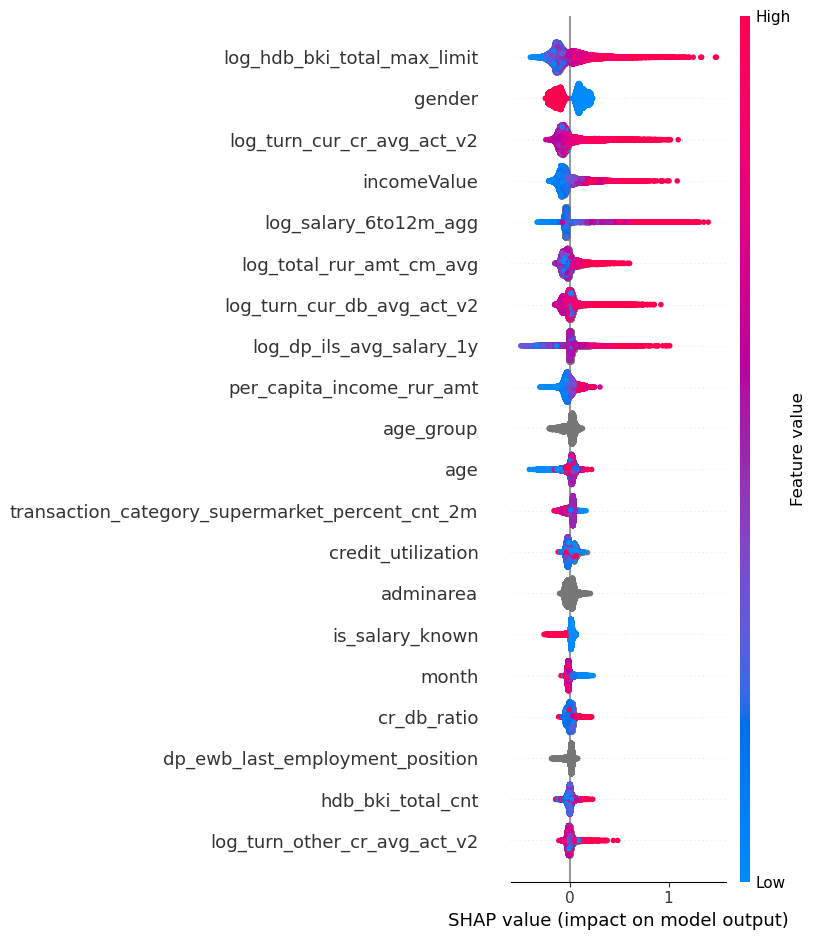

In [142]:
import shap

pool = Pool(X_train, cat_features=categorical_features)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(pool)

# Summary plot
shap.summary_plot(shap_values, X_train)

In [143]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,log_hdb_bki_total_max_limit,14.510578
1,log_turn_cur_cr_avg_act_v2,10.851955
2,incomeValue,8.810996
3,log_turn_cur_db_avg_act_v2,7.776487
4,gender,6.009939
5,log_dp_ils_avg_salary_1y,5.251796
6,log_salary_6to12m_agg,5.191293
7,per_capita_income_rur_amt,4.885104
8,log_total_rur_amt_cm_avg,4.861567
9,age,3.801335


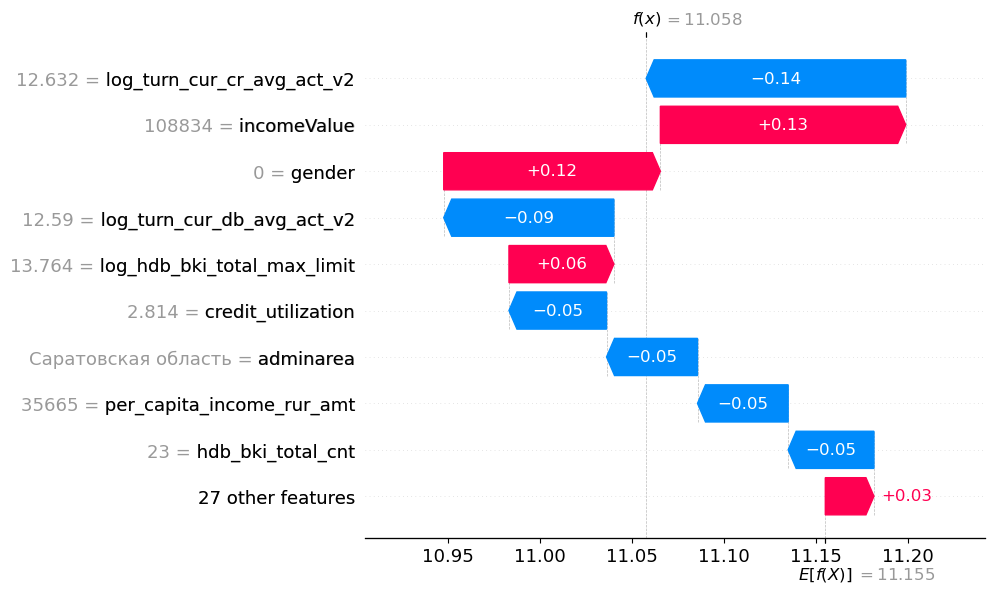

In [150]:
# Объяснение конкретного прогноза
explainer = shap.TreeExplainer(model)
shap_values = explainer(df)
shap.initjs()

i = 1

shap.plots.waterfall(shap_values[i])


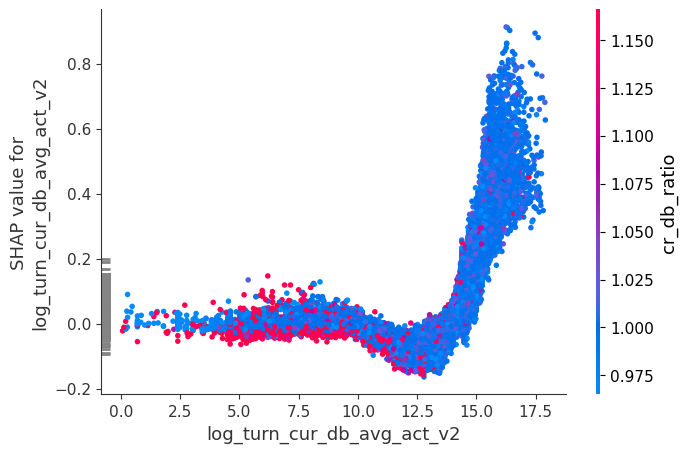

In [158]:
shap.dependence_plot('log_turn_cur_db_avg_act_v2', shap_values.values, df)

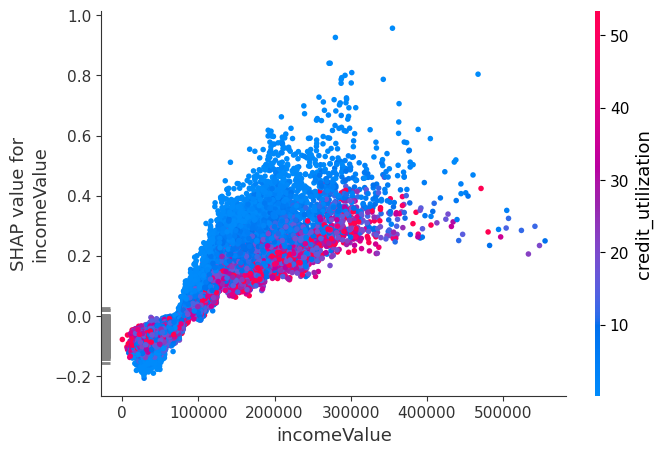

In [159]:
shap.dependence_plot('incomeValue', shap_values.values, df)

In [ ]:
y_true = 
plt.scatter(y_true, y_pred)